In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from eigenDecomposition import CovarianceMatrix, EigenDecomposition
import pandas as pd

In [2]:
path = './Data Mentah/'
with open(path+'Alkohol.txt', 'r') as file:
    alkohol = np.loadtxt(file, delimiter='\t')

with open(path+'Aseton.txt', 'r') as file:
    aseton = np.loadtxt(file, delimiter='\t')

with open(path+'Etanol.txt', 'r') as file:
    etanol = np.loadtxt(file, delimiter='\t')

In [3]:
scaler_alkohol = MinMaxScaler()
scaler_aseton = MinMaxScaler()
scaler_etanol = MinMaxScaler()
alkohol[:, 1] = scaler_alkohol.fit_transform(alkohol[:, 1].reshape(-1, 1)).reshape(-1)
aseton[:, 1] = scaler_aseton.fit_transform(aseton[:, 1].reshape(-1, 1)).reshape(-1)
etanol[:, 1] = scaler_etanol.fit_transform(etanol[:, 1].reshape(-1, 1)).reshape(-1)


In [4]:
# Variasi Alkohol - Aseton [8:2, 7:3, 6:4, 5:5, 4:6, 3:7, 2:8]

alkohol_aseton = {
    '8:2': np.vstack((alkohol[:,0], alkohol[:, 1]*0.8 + aseton[:, 1]*0.2)),
    '7:3': np.vstack((alkohol[:,0], alkohol[:, 1]*0.7 + aseton[:, 1]*0.3)),
    '6:4': np.vstack((alkohol[:,0], alkohol[:, 1]*0.6 + aseton[:, 1]*0.4)),
    '5:5': np.vstack((alkohol[:,0], alkohol[:, 1]*0.5 + aseton[:, 1]*0.5)),
    '4:6': np.vstack((alkohol[:,0], alkohol[:, 1]*0.4 + aseton[:, 1]*0.6)),
    '3:7': np.vstack((alkohol[:,0], alkohol[:, 1]*0.3 + aseton[:, 1]*0.7)),
    '2:8': np.vstack((alkohol[:,0], alkohol[:, 1]*0.2 + aseton[:, 1]*0.8))
}

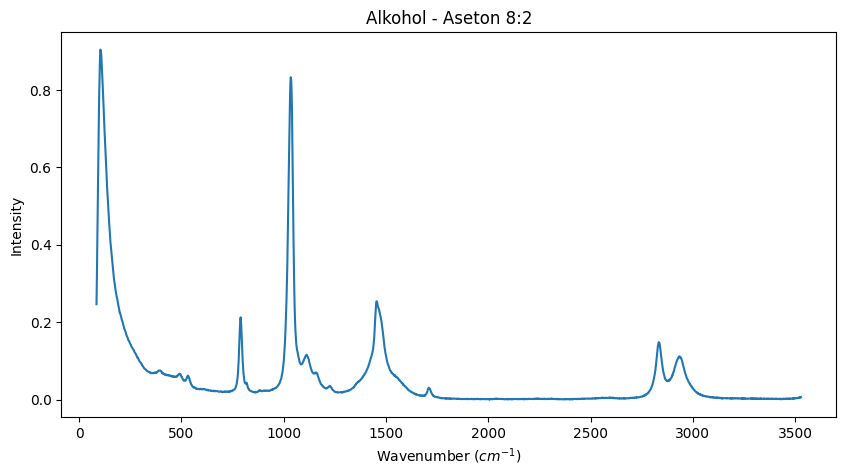

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(alkohol_aseton['8:2'][0], alkohol_aseton['8:2'][1])
plt.title('Alkohol - Aseton 8:2')
plt.xlabel(r'Wavenumber $(cm^{-1})$')
plt.ylabel('Intensity')
plt.show()


In [10]:
D = np.concatenate(
        (
            alkohol_aseton['8:2'][1].reshape(-1, 1),
            alkohol_aseton['7:3'][1].reshape(-1, 1),
            alkohol_aseton['6:4'][1].reshape(-1, 1),
            alkohol_aseton['5:5'][1].reshape(-1, 1),
            alkohol_aseton['4:6'][1].reshape(-1, 1),
            alkohol_aseton['3:7'][1].reshape(-1, 1),
            alkohol_aseton['2:8'][1].reshape(-1, 1)
        ),
        axis=1
    )

In [16]:
np.matmul(D.T, D)

array([[29.69382172, 28.69877986, 27.70373799, 26.70869613, 25.71365426,
        24.71861239, 23.72357053],
       [28.69877986, 27.87361176, 27.04844366, 26.22327556, 25.39810747,
        24.57293937, 23.74777127],
       [27.70373799, 27.04844366, 26.39314933, 25.737855  , 25.08256067,
        24.42726634, 23.77197201],
       [26.70869613, 26.22327556, 25.737855  , 25.25243444, 24.76701388,
        24.28159331, 23.79617275],
       [25.71365426, 25.39810747, 25.08256067, 24.76701388, 24.45146708,
        24.13592029, 23.82037349],
       [24.71861239, 24.57293937, 24.42726634, 24.28159331, 24.13592029,
        23.99024726, 23.84457423],
       [23.72357053, 23.74777127, 23.77197201, 23.79617275, 23.82037349,
        23.84457423, 23.86877497]])

In [20]:
eigen = EigenDecomposition(D)
concentration = eigen.getPureConcentration()

In [22]:
concentration.T

array([[0.18493675, 0.81506325],
       [0.26691685, 0.73308315],
       [0.34889694, 0.65110306],
       [0.43087703, 0.56912297],
       [0.51285713, 0.48714287],
       [0.59483722, 0.40516278],
       [0.67681732, 0.32318268]])

In [25]:
df = pd.DataFrame(concentration.T, columns=['x', 'y'])
df['Alkohol'] = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
df['Aseton'] = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
df

,x,y,Alkohol,Aseton
0,0.184937,0.815063,0.8,0.2
1,0.266917,0.733083,0.7,0.3
2,0.348897,0.651103,0.6,0.4
3,0.430877,0.569123,0.5,0.5
4,0.512857,0.487143,0.4,0.6
5,0.594837,0.405163,0.3,0.7
6,0.676817,0.323183,0.2,0.8


In [33]:
relative_error = df[['Alkohol', 'Aseton']].values - df[['y', 'x']].values
relative_error = abs(relative_error[:,0])
rmse = np.sqrt(np.mean(relative_error**2))
rmse

0.07795416857869099